In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install --upgrade keras

In [3]:
import tensorflow as tf
import keras

In [4]:
# In ANN and Linear Regression aLL steps are same only except the modelling, in Linear Regression the model is alredy availble(i.e. LinearRegression())
# but in ANN we have not already available model, we have to create it and use it as per our requirement.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Step-1 : Understand the Business Problem
         
          # This is the project about the Energy production depending on the some environment factors like Temperature, Humidity, Pressure, and Vaccum.
          # So, we have to identify the pattern of energy production depending on that environment factors.
    
        
        

        
# Step-2 : Data Understanding
          
          # This dataset having five columns in which the output column Energy is depending on the input columns Temperature, Humidity, Pressure and Vaccum
          # So, we have to identify how the energy values varies with the input values of all input variables.
          # All columns are discrete continues variables
            
            
df = pd.read_excel("energy.xlsx")
print(df)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


In [6]:
df.rename(columns={"AT":"TEMPERATURE",
                  "V":"VACCUM",
                  "AP":"PRESSURE",
                  "RH":"HUMIDITY",
                  "PE":"ENERGY"},inplace=True)
print(df)

      TEMPERATURE  VACCUM  PRESSURE  HUMIDITY  ENERGY
0           14.96   41.76   1024.07     73.17  463.26
1           25.18   62.96   1020.04     59.08  444.37
2            5.11   39.40   1012.16     92.14  488.56
3           20.86   57.32   1010.24     76.64  446.48
4           10.82   37.50   1009.23     96.62  473.90
...           ...     ...       ...       ...     ...
9563        16.65   49.69   1014.01     91.00  460.03
9564        13.19   39.18   1023.67     66.78  469.62
9565        31.32   74.33   1012.92     36.48  429.57
9566        24.48   69.45   1013.86     62.39  435.74
9567        21.60   62.52   1017.23     67.87  453.28

[9568 rows x 5 columns]


In [7]:
df.shape

(9568, 5)

In [8]:
print(df["TEMPERATURE"].unique())
print(df["TEMPERATURE"].value_counts())   # unique(), value_counts()---> both are not that much uesful for the discrete variables

[14.96 25.18  5.11 ... 30.    5.01  9.71]
TEMPERATURE
25.21    14
13.78    12
24.43    11
23.56    10
11.02    10
         ..
9.89      1
7.34      1
12.92     1
27.72     1
9.71      1
Name: count, Length: 2773, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TEMPERATURE  9568 non-null   float64
 1   VACCUM       9568 non-null   float64
 2   PRESSURE     9568 non-null   float64
 3   HUMIDITY     9568 non-null   float64
 4   ENERGY       9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
None
----------------------------------------------------------------------------------------------------
       TEMPERATURE       VACCUM     PRESSURE     HUMIDITY       ENERGY
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.0

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


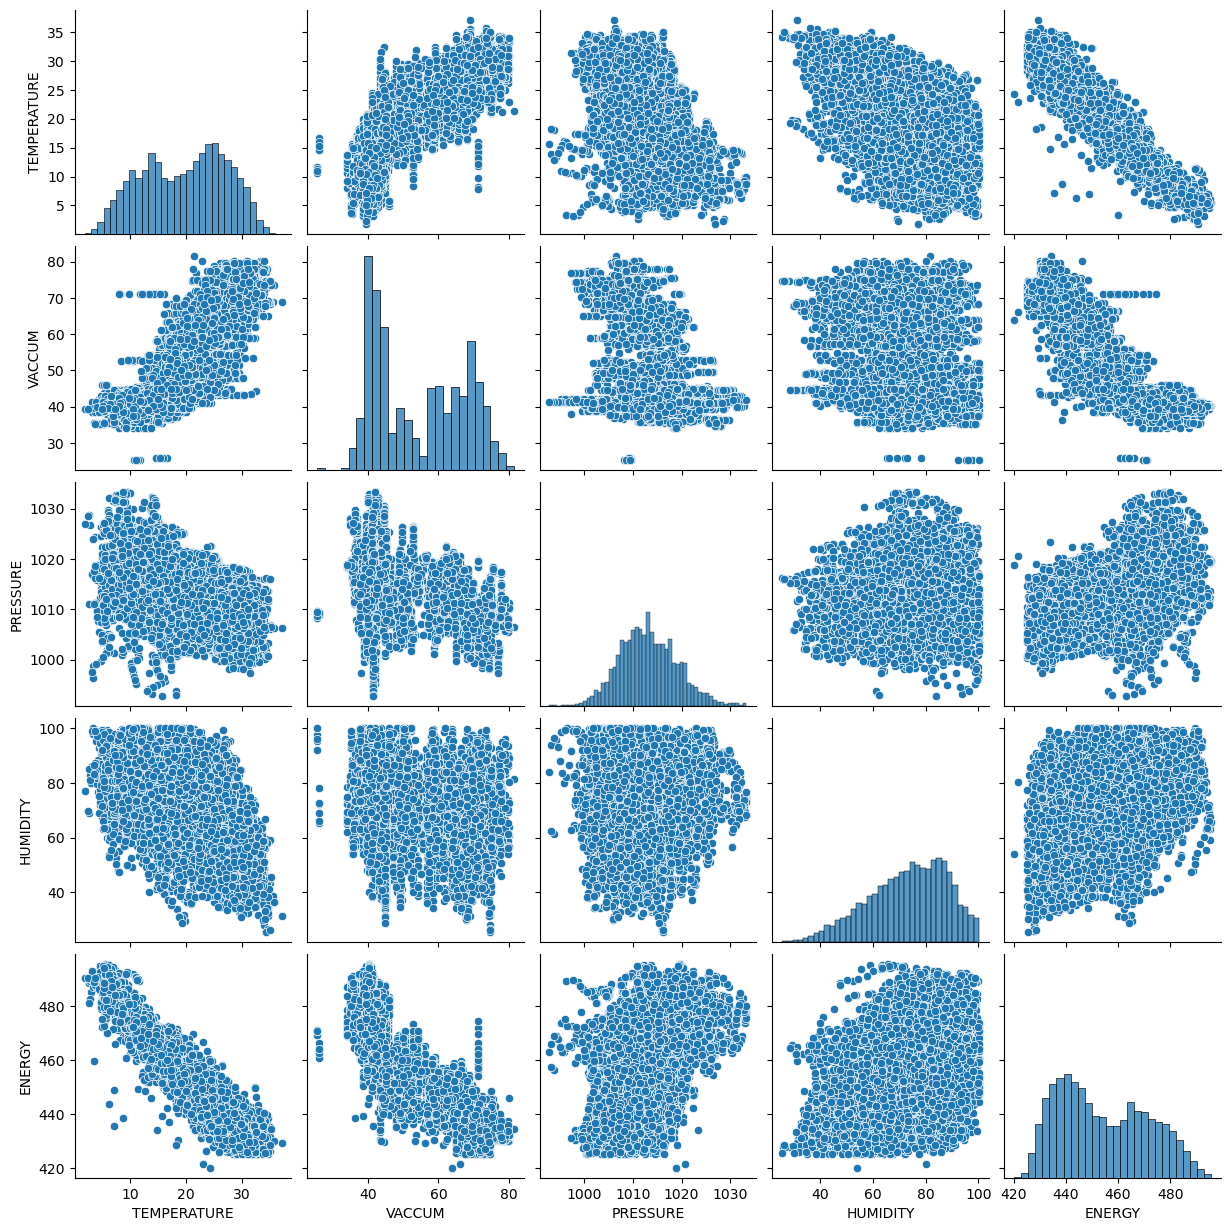

----------------------------------------------------------------------------------------------------


In [9]:
print(df.info())
print("-"*100)

print(df.describe())  # ---> It will give mean,min,max,quartiles,count,... of all the columns from that we can desribe that how's the data is varies in columns
print("-"*100)

print(df.cov())   # ---> It will give covarience between all the variables with respect to each other.
print("-"*100)

print(df.corr())  # ---> It will give corelation between all the variables with respect to each other.
print("-"*100)

sns.pairplot(df)  # ---> From this we can observe that their is a relation between input and output variable, we have to identify that relation
plt.show()
print("-"*100)

TEMPERATURE    0
VACCUM         0
PRESSURE       0
HUMIDITY       0
ENERGY         0
dtype: int64
----------------------------------------------------------------------------------------------------
41


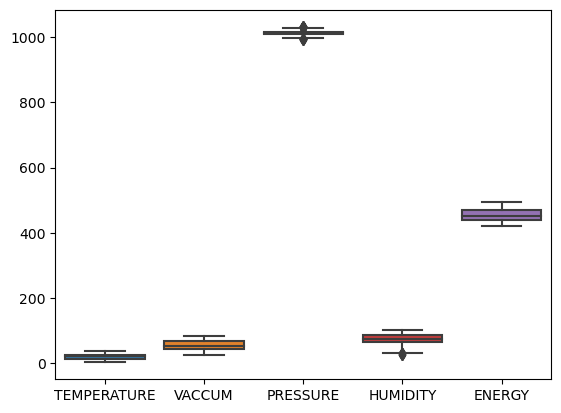

In [10]:
# Step-3 : Data Preprocessing

# 1) Data Cleaning : Check whether any wrong data is in dataset or not

# All the columns in dataset having float datatypes so, there will not any wrong data or record.

print(df.isnull().sum())  # ---> All rhe columns have zero null value or missing value
print("-"*100)

print(df.duplicated().sum())  # ---> Both columns have zero duplicates value

sns.boxplot(df)   # ---> From this we can see that there is no ouliers are there for all the columns,
plt.show()             # here we should not remove the outliers beacuse it possiblity of high changes in the environment conditions

In [11]:
# 2) # Data Wrangling : Check if any data transformation is required or not

# Here we can observe that some variables(like PRESSURE & ENERGY) have high magnitude(high value) as compared to the other variables, 
# so we should apply scaling to transform the high values into low values that we will get better accuracy.



In [12]:
# Step-4 : Split the dataset into two parts train data and test data

X = df.drop("ENERGY",axis=1)    # or  X = df.drop(columns="ENERGY")
print(X)
print("-"*100)

y = df["ENERGY"]
print(y)
print("-"*100)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=9)



      TEMPERATURE  VACCUM  PRESSURE  HUMIDITY
0           14.96   41.76   1024.07     73.17
1           25.18   62.96   1020.04     59.08
2            5.11   39.40   1012.16     92.14
3           20.86   57.32   1010.24     76.64
4           10.82   37.50   1009.23     96.62
...           ...     ...       ...       ...
9563        16.65   49.69   1014.01     91.00
9564        13.19   39.18   1023.67     66.78
9565        31.32   74.33   1012.92     36.48
9566        24.48   69.45   1013.86     62.39
9567        21.60   62.52   1017.23     67.87

[9568 rows x 4 columns]
----------------------------------------------------------------------------------------------------
0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: ENERGY, Length: 9568, dtype: float64
----------------------------------------------------------------------------------------------------


In [13]:
# Here we can observe that some variables(like PRESSURE & ENERGY) have high magnitude(high value) as compared to the other variables, 
# so we should apply scaling to transform the high values into low values that we will get better accuracy.

# Data Scaling :

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train)
print("-"*100)
print(X_test)

[[ 0.22011738  0.39459668  0.09704125  0.76366224]
 [ 0.08570286  0.42683197  0.33422453  0.36715795]
 [ 1.35995249  1.30583328 -0.91393145  0.28758269]
 ...
 [-0.79874466 -0.00559265  0.77999452  0.38979574]
 [ 1.3303813  -0.12038172 -1.20494355 -2.1422066 ]
 [-1.19929992 -0.84135149 -0.25284614  0.45976708]]
----------------------------------------------------------------------------------------------------
[[-0.33904701 -0.99938303 -0.38405391 -1.07960253]
 [ 1.41640659  1.37030386 -0.3571395  -0.87380445]
 [ 1.16236315  0.89149188  0.23834193 -0.96778557]
 ...
 [-0.79067979 -1.03869436  1.41248326  0.16273186]
 [-0.75573201 -1.08586796  0.86578422 -0.52188974]
 [-1.7759382  -1.46247049  0.94316316 -0.38126106]]


# Building the ANN model

In [15]:
from keras.models import Sequential
from keras.layers import Dense       # Dense is used to connecting input and output neurons

In [20]:
# Step-4 : Modelling  (that we have to create model)

def ann_model_regressor():
    
    # Initializing the ANN model
    model = Sequential()
    
    # Adding the input layer and the first hidden layer into the model
    model.add(Dense(input_dim=4, units=6, activation='relu', kernel_initializer="uniform"))
                    # Here, input_dim means input layer is having 4 neurons & 1st hidden layer having 6 neurons with 'Relu' as the activation function and 
                    # kernel initializer is 'uniform' means the weights should be uniform i.e. no. of postive and negative weights should be equal means
                    # if total no. of neurons are 8 then we should take 4 positive and 4 negative neurons. 
        
    # Adding the second hidden layer into the model
    model.add(Dense(units=6, activation='relu', kernel_initializer="uniform"))   #  units means the no. of neurons the perticular layer
                    # Similarly, here 2nd hidden layer have 6 neurons
        
    # Adding the output layer into the model
    model.add(Dense(units=1, activation='relu', kernel_initializer="uniform"))
                    # Similarly, here the output layer with the one neuron means this is the Regression or Binary Classification Project. 
                    # But here output variable is descrete contionues variable, not a categorical variable, so this is the Regression Project. 
    # Compiling the ANN model
    model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
    
    return model



# While creating ANN model we should understand the following things:

      # When we have the input_dim in the statement then that statement is the input layer with that equal no. of neurons in it.
      
      # And the last statement(line) which add in the ANN model(model.add()) is the output layer of ANN model.
            # For Regression or Binary-class Classification projects the units(no. of neurons) in output layer is equal to 1.
            # For Multi-class Classification projects the units in output layer is eaual to the no. of classes(categories) in the output variable.
      # And the statements in between of input layer statement and output layer statetment are the hidden layer(s) with that units no. of neurons
            # The 1st hidden layer statement is coded in the input layer statement.

    

In [21]:
ann = ann_model_regressor()    # Here , the ann or the ann_model_regressor() is the ANN model which is created by us, so we can use it to identify the pattern of the dataset.
ann

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential_1, built=True>

In [25]:
# To identify the pattern of the dataset we have to train the created ANN model on the train data, so
ann.fit(X_train, y_train, batch_size= 8, epochs = 10)# Here, batch_size means the total no. of records of the dataset divided into the that no. of groups
                                                              # (ex. batch_size=32, means the total no. of records will divided into 32 groups)
                                                        # epochs means the complete cycles(means 1 epoch = 1 Forward Propogation + 1 Backward Propogation)


Epoch 1/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22.4615
Epoch 2/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.5569
Epoch 3/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.1303
Epoch 4/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.3217
Epoch 5/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 21.1943
Epoch 6/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - loss: 21.3032
Epoch 7/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 20.9268
Epoch 8/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.1351
Epoch 9/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 21.2991
Epoch 10/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 21.7164


In [27]:
# Step-5 : Prediction 

ypred_train = ann.predict(X_train)
print(ypred_train)
print("-"*100)

ypred_test = ann.predict(X_test)
print(ypred_test)

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[447.24994]
 [450.28342]
 [428.91513]
 ...
 [464.43063]
 [439.10468]
 [471.49695]]
----------------------------------------------------------------------------------------------------
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[463.35416]
 [431.29324]
 [436.88126]
 ...
 [468.06995]
 [469.05112]
 [484.44464]]


In [30]:
 # Evaluation : 
    
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train,ypred_train)
print("MSE_train : ", MSE_train)
MSE_test = mean_squared_error(y_test,ypred_test)
print("MSE_test : ", MSE_test)


MSE_train :  22.252979742913947
MSE_test :  21.87189530614141


In [31]:
RMSE_train = np.sqrt(MSE_train)
print("RMSE_train:",RMSE_train)
RMSE_test = np.sqrt(MSE_test)
print("RMSE_test:",RMSE_test)
print("-"*100)

RMSE_train: 4.717306407571375
RMSE_test: 4.676739815955278
----------------------------------------------------------------------------------------------------


In [37]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train,ypred_train)
print("r2_train :", r2_train)
r2_test = r2_score(y_test,ypred_test)
print("r2_test :", r2_test)

r2_train : 0.9232790774431671
r2_test : 0.9261114071725338


In [36]:
# Ask to sir about model.score parameter


#train_accuracy = ann.score(X_train,y_train)
#print("train_accuracy:",train_accuracy)
#test_accuracy = ann.score(X_test,y_test)
#print("test_accuracy:",test_accuracy)
#print("-"*100)